In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [20]:
# in this notebook, we'd like to predict the label 'romana final'
# this is a regression problem, because our label is a continuos value
df = pd.read_csv('note.csv')
df = df.reset_index()

In [21]:
df.head()

index                      nume judet8  \
0      0          cireap p. florin  BIHOR   
1      1     gabor i. ionut darius  BIHOR   
2      2   bogan s. sebastian doru  BIHOR   
3      3     apati m. mihai bogdan  BIHOR   
4      4  filip g. flaviu georgian  BIHOR   

                                 scoala  media la admitere  \
0            SC.CU CLS.I-VIII PIETROASA               9.32   
1  SC.CU CLS.I-VIII "N.POPOVICIU" BEIUS               9.12   
2             SC.CU CLS.I-VIII CALUGARI               8.71   
3              SC.CU CLS.I-VIII CARASAU               8.36   
4     LICEUL PEDAGOGIC "N.BOLCAS" BEIUS               8.31   

   media teze nationale  media de absolvire  nota la limba romana  \
0                  9.10                9.54                  8.17   
1                  8.63                9.62                  8.30   
2                  7.90                9.52                  7.62   
3                  8.21                8.51                  7.30   
4                  7.73                8.89                  6.40   

   nota la matematica  optional8  ...  disciplina profil nota  \
0                9.45  Geografie  ...                    3.30   
1                8.00  Geografie  ...                    1.55   
2                6.97  Geografie  ...                    2.80   
3                7.95  Geografie  ...                    3.85   
4                8.72    Istorie  ...                    3.65   

  disciplina profil contestatie disciplina profil final  \
0                           NaN                    3.30   
1                           NaN                    1.55   
2                           2.3                    2.30   
3                           4.2                    3.85   
4                           3.4                    3.65   

                                            optional  optional nota  \
0  Anatomie si fiziologie umana, genetica si ecol...           6.60   
1  Anatomie si fiziologie umana, genetica si ecol...           7.55   
2  Anatomie si fiziologie umana, genetica si ecol...           6.70   
3  Anatomie si fiziologie umana, genetica si ecol...           6.30   
4  Anatomie si fiziologie umana, genetica si ecol...           8.60   

  optional contestatie optional final competente digitale media  \
0                  NaN           6.60             Avansat  5.07   
1                  NaN           7.55               Mediu  5.60   
2                  NaN           6.70               Mediu  5.40   
3                  NaN           6.30               Mediu  5.05   
4                  NaN           8.60             Avansat  6.40   

  rezultatul final  
0          Respins  
1          Respins  
2          Respins  
3          Respins  
4          Respins  

[5 rows x 42 columns]

In [4]:
df.keys()

Index([u'index', u'nume', u'judet8', u'scoala', u'media la admitere',
       u'media teze nationale', u'media de absolvire', u'nota la limba romana',
       u'nota la matematica', u'optional8', u'optional8 nota',
       u'limba materna8', u'limba materna8 nota',
       u'pozitia in ierarhie pe judet', u'pozitia in ierarhie pe tara',
       u'unitatea de invatamant', u'judetul', u'promotie anterioara',
       u'forma invatamant', u'specializare', u'romana oral', u'romana nota',
       u'romana contestatie', u'romana final', u'limba materna',
       u'materna oral', u'materna nota', u'materna contestatie',
       u'materna final', u'limba moderna', u'limba moderna nota',
       u'disciplina profil', u'disciplina profil nota',
       u'disciplina profil contestatie', u'disciplina profil final',
       u'optional', u'optional nota', u'optional contestatie',
       u'optional final', u'competente digitale', u'media',
       u'rezultatul final'],
      dtype='object')

In [5]:
#check the type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10112 entries, 0 to 10111
Data columns (total 42 columns):
index                            10112 non-null int64
nume                             10112 non-null object
judet8                           10112 non-null object
scoala                           10112 non-null object
media la admitere                10112 non-null float64
media teze nationale             10112 non-null float64
media de absolvire               10112 non-null float64
nota la limba romana             10112 non-null float64
nota la matematica               10112 non-null float64
optional8                        10112 non-null object
optional8 nota                   10112 non-null float64
limba materna8                   10112 non-null object
limba materna8 nota              10112 non-null object
pozitia in ierarhie pe judet     10112 non-null int64
pozitia in ierarhie pe tara      10112 non-null int64
unitatea de invatamant           10112 non-null object
judetul 

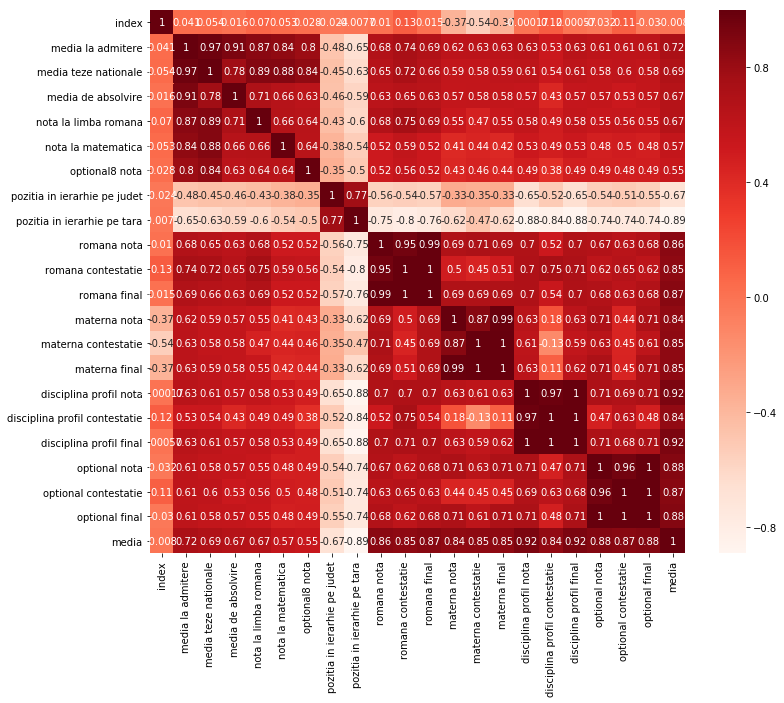

In [6]:
#see correlations between features
#Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
#features to drop because of high correlation
#correlation with target
cor_target = abs(cor['romana final'])

#selecting highly correlated features
cor_target[cor_target>0.7]

pozitia in ierarhie pe tara    0.755018
romana nota                    0.994553
romana contestatie             0.996705
romana final                   1.000000
disciplina profil nota         0.701013
disciplina profil final        0.701654
media                          0.867656
Name: romana final, dtype: float64

In [13]:
# 'disciplina profil final' and 'disciplina profil nota' won't be removed because (we know that) they are not highly correlated
# with the final grade
# Now, check which feautures are correlated with each other
# usually they do not work well with Linear Regression but Random Forest and other algorithms can handle them well

corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

for col in upper.columns:
    for column in upper.columns:
        if upper[col][column] > 0.7:
            print col,",", column, ",", upper[col][column]

media teze nationale , media la admitere , 0.9655196770801241
media de absolvire , media la admitere , 0.9135406400044599
media de absolvire , media teze nationale , 0.7761670804252022
nota la limba romana , media la admitere , 0.8657193251786941
nota la limba romana , media teze nationale , 0.8883163047127001
nota la limba romana , media de absolvire , 0.7089494313143319
nota la matematica , media la admitere , 0.8402398846110551
nota la matematica , media teze nationale , 0.8820549234953408
optional8 nota , media la admitere , 0.8004583967214143
optional8 nota , media teze nationale , 0.8374935156160862
pozitia in ierarhie pe tara , pozitia in ierarhie pe judet , 0.7725971898119153
romana nota , pozitia in ierarhie pe tara , 0.7503369808865339
romana contestatie , media la admitere , 0.7366297524788937
romana contestatie , media teze nationale , 0.7243609994884994
romana contestatie , nota la limba romana , 0.7536375455872151
romana contestatie , pozitia in ierarhie pe tara , 0.79546

In [ ]:
# we can see that 'media teze nationale' and 'media la admitere' are highly correlated(because one is used in the calculation of the other one)
# 'nota la limba romana' and 'optional8 nota' and 'nota la matematica' are highly correlated
# with both the 'media la admitere' and 'media teze nationale'
# these are obvious because some of the columns are just the average of other columns, so these will be removed
# but there is a neat trick here: we won't include the 'limba materna8 nota' feature because it has many empty values, but instead
# we include both the 'media teze nationale' and the grades for other subjects because in this way
# 'media teze nationale' will contain in itself the value for 'limba materna8 nota'

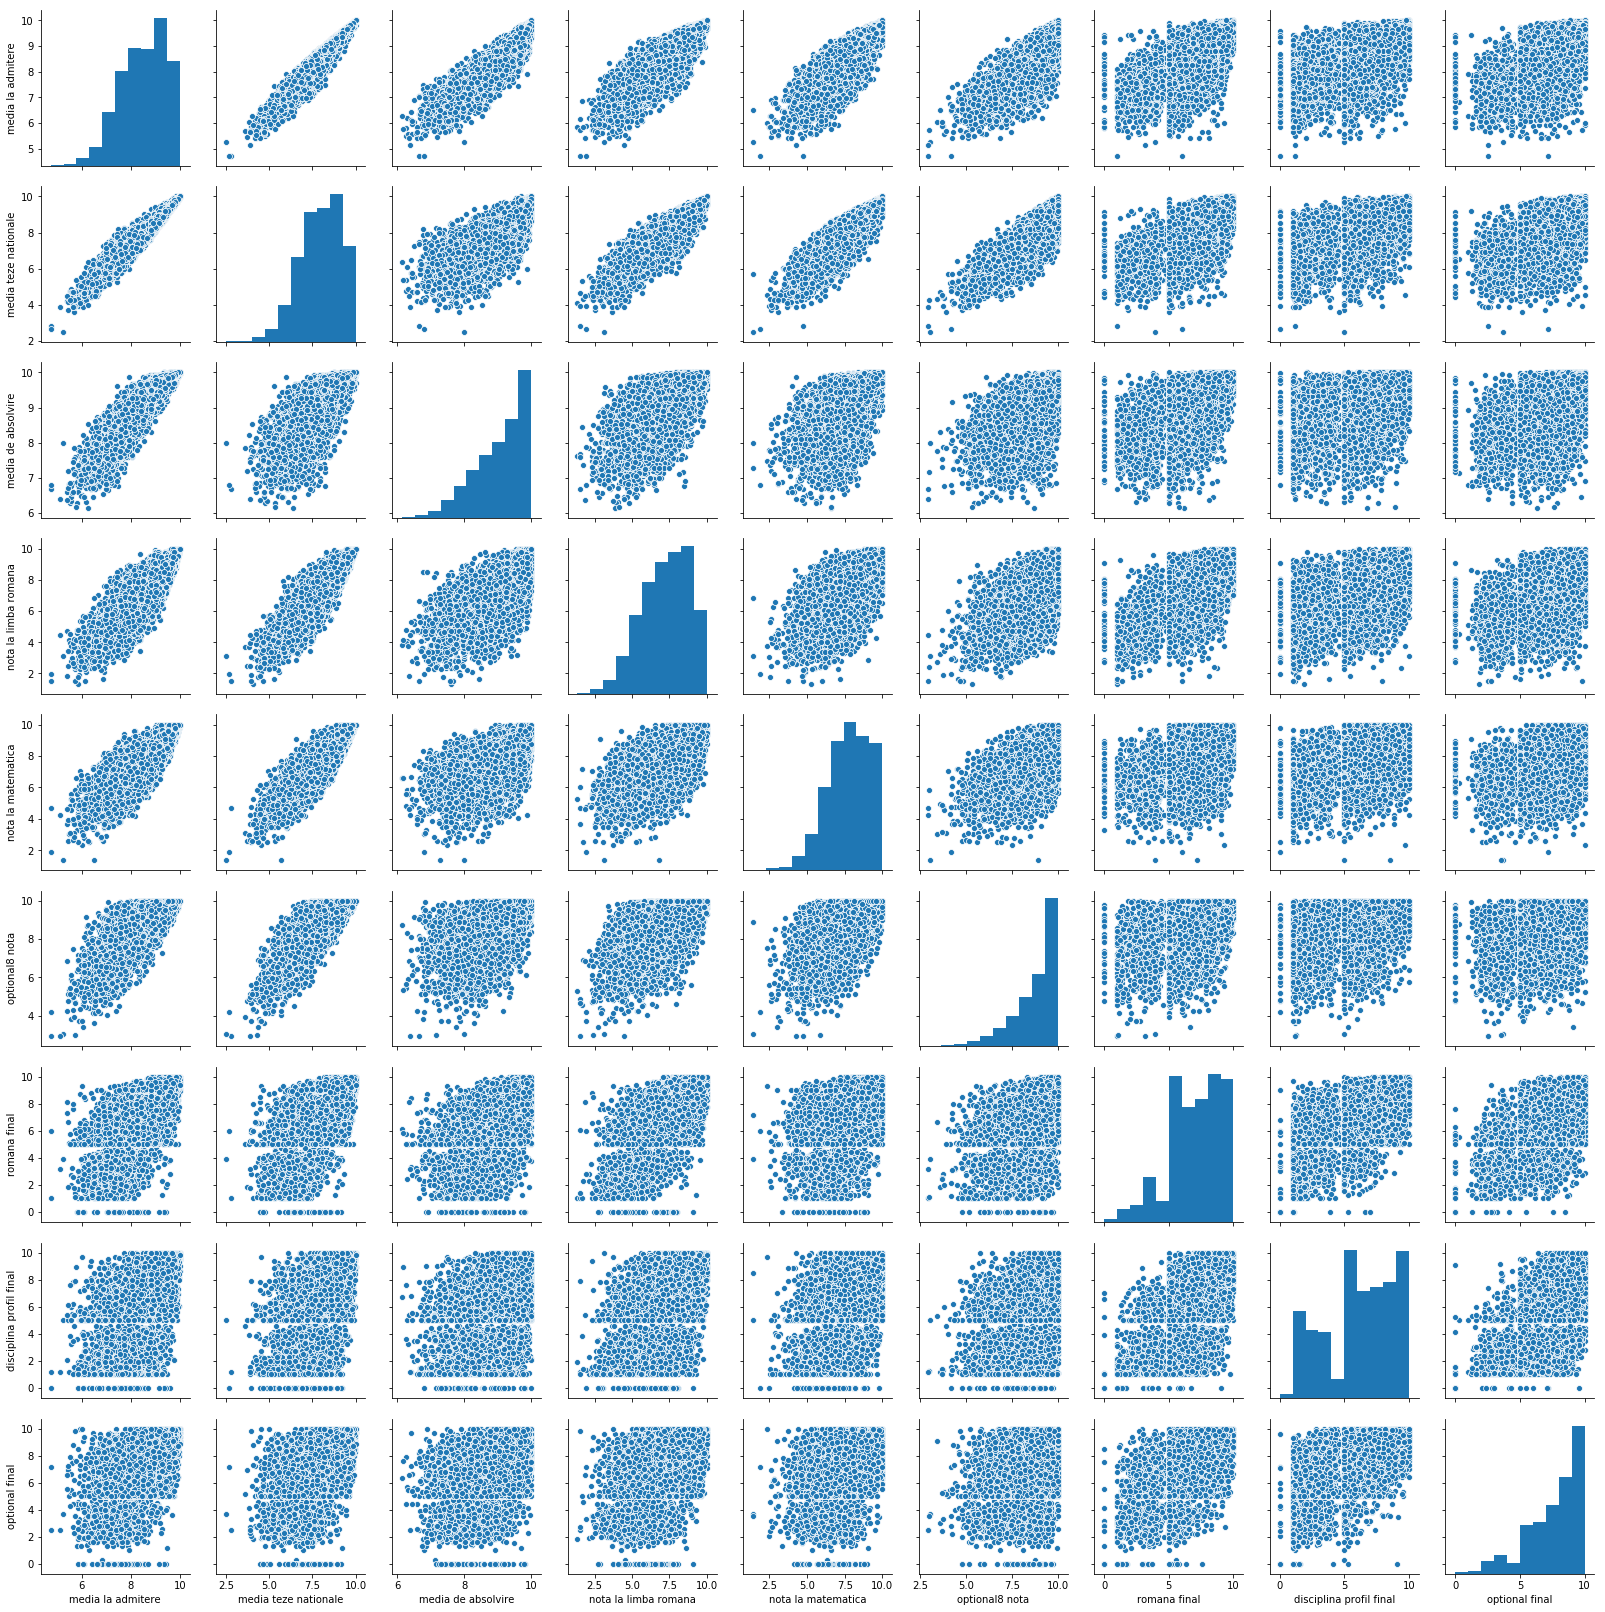

In [24]:
#now we include a pairplot with the number-based features to see their 
pair = df.drop(['nume', 'index','romana contestatie','limba materna','materna oral','materna nota','materna contestatie','materna final',
            'limba moderna nota','disciplina profil nota', 'disciplina profil contestatie', 'optional nota', 'optional contestatie',
            'media','rezultatul final','romana nota','pozitia in ierarhie pe tara', 'pozitia in ierarhie pe judet',
            'limba materna8','limba materna8 nota'],
            axis=1)

sns.pairplot(pair)

In [21]:
pair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10112 entries, 0 to 10111
Data columns (total 22 columns):
index                            10112 non-null int64
media la admitere                10112 non-null float64
media teze nationale             10112 non-null float64
media de absolvire               10112 non-null float64
nota la limba romana             10112 non-null float64
nota la matematica               10112 non-null float64
optional8 nota                   10112 non-null float64
pozitia in ierarhie pe judet     10112 non-null int64
pozitia in ierarhie pe tara      10112 non-null int64
romana nota                      10112 non-null float64
romana contestatie               1103 non-null float64
romana final                     10112 non-null float64
materna nota                     938 non-null float64
materna contestatie              64 non-null float64
materna final                    938 non-null float64
disciplina profil nota           10112 non-null float64
disciplin

In [26]:
pair.columns

Index([u'judet8', u'scoala', u'media la admitere', u'media teze nationale',
       u'media de absolvire', u'nota la limba romana', u'nota la matematica',
       u'optional8', u'optional8 nota', u'unitatea de invatamant', u'judetul',
       u'promotie anterioara', u'forma invatamant', u'specializare',
       u'romana oral', u'romana final', u'limba moderna', u'disciplina profil',
       u'disciplina profil final', u'optional', u'optional final',
       u'competente digitale'],
      dtype='object')

In [24]:
number_columns = []
for col in df.columns:
    if df[col].dtype != 'object' and df[col].isna().sum()==0 and col!='index':
        number_columns.append(col)

In [25]:
number_columns

['media la admitere',
 'media teze nationale',
 'media de absolvire',
 'nota la limba romana',
 'nota la matematica',
 'optional8 nota',
 'pozitia in ierarhie pe judet',
 'pozitia in ierarhie pe tara',
 'romana nota',
 'romana final',
 'disciplina profil nota',
 'disciplina profil final',
 'optional nota',
 'optional final',
 'media']

In [26]:
df[number_columns]

media la admitere  media teze nationale  media de absolvire  \
0                   9.32                  9.10                9.54   
1                   9.12                  8.63                9.62   
2                   8.71                  7.90                9.52   
3                   8.36                  8.21                8.51   
4                   8.31                  7.73                8.89   
5                   8.10                  7.30                8.90   
6                   8.08                  6.70                9.47   
7                   8.04                  7.18                8.91   
8                   8.03                  8.48                7.58   
9                   8.01                  8.32                7.71   
10                  7.90                  7.41                8.39   
11                  7.73                  7.00                8.47   
12                  7.65                  7.36                7.94   
13                  7.60                  7.01                8.19   
14                  7.59                  7.18                8.00   
15                  7.56                  6.30                8.83   
16                  7.52                  7.16                7.89   
17                  7.52                  6.66                8.38   
18                  7.46                  7.93                6.99   
19                  7.46                  6.92                8.01   
20                  7.45                  6.74                8.16   
21                  7.42                  7.11                7.74   
22                  7.37                  7.01                7.74   
23                  7.35                  6.21                8.50   
24                  7.29                  6.20                8.38   
25                  7.88                  6.87                8.90   
26                  7.85                  7.77                7.93   
27                  7.84                  7.84                7.84   
28                  7.81                  7.76                7.86   
29                  7.80                  7.70                7.90   
...                  ...                   ...                 ...   
10082              10.00                 10.00               10.00   
10083               9.92                  9.85               10.00   
10084               9.78                  9.58                9.99   
10085               9.76                  9.82                9.71   
10086               9.61                  9.30                9.92   
10087               9.41                  8.90                9.92   
10088               9.31                  8.91                9.71   
10089               9.25                  8.90                9.61   
10090               9.14                  8.64                9.64   
10091               8.96                  8.19                9.74   
10092               8.67                  7.67                9.68   
10093               7.13                  6.10                8.17   
10094               9.81                  9.70                9.93   
10095               9.67                  9.39                9.95   
10096               9.64                  9.45                9.84   
10097               9.61                  9.28                9.94   
10098               9.50                  9.33                9.68   
10099               9.48                  9.14                9.82   
10100               9.47                  9.07                9.87   
10101               9.34                  8.93                9.75   
10102               9.30                  8.86                9.74   
10103               9.72                  9.56                9.89   
10104               9.68                  9.50                9.87   
10105               9.51                  9.20                9.83   
10106               9.37                  9.19                9.56   
10107            

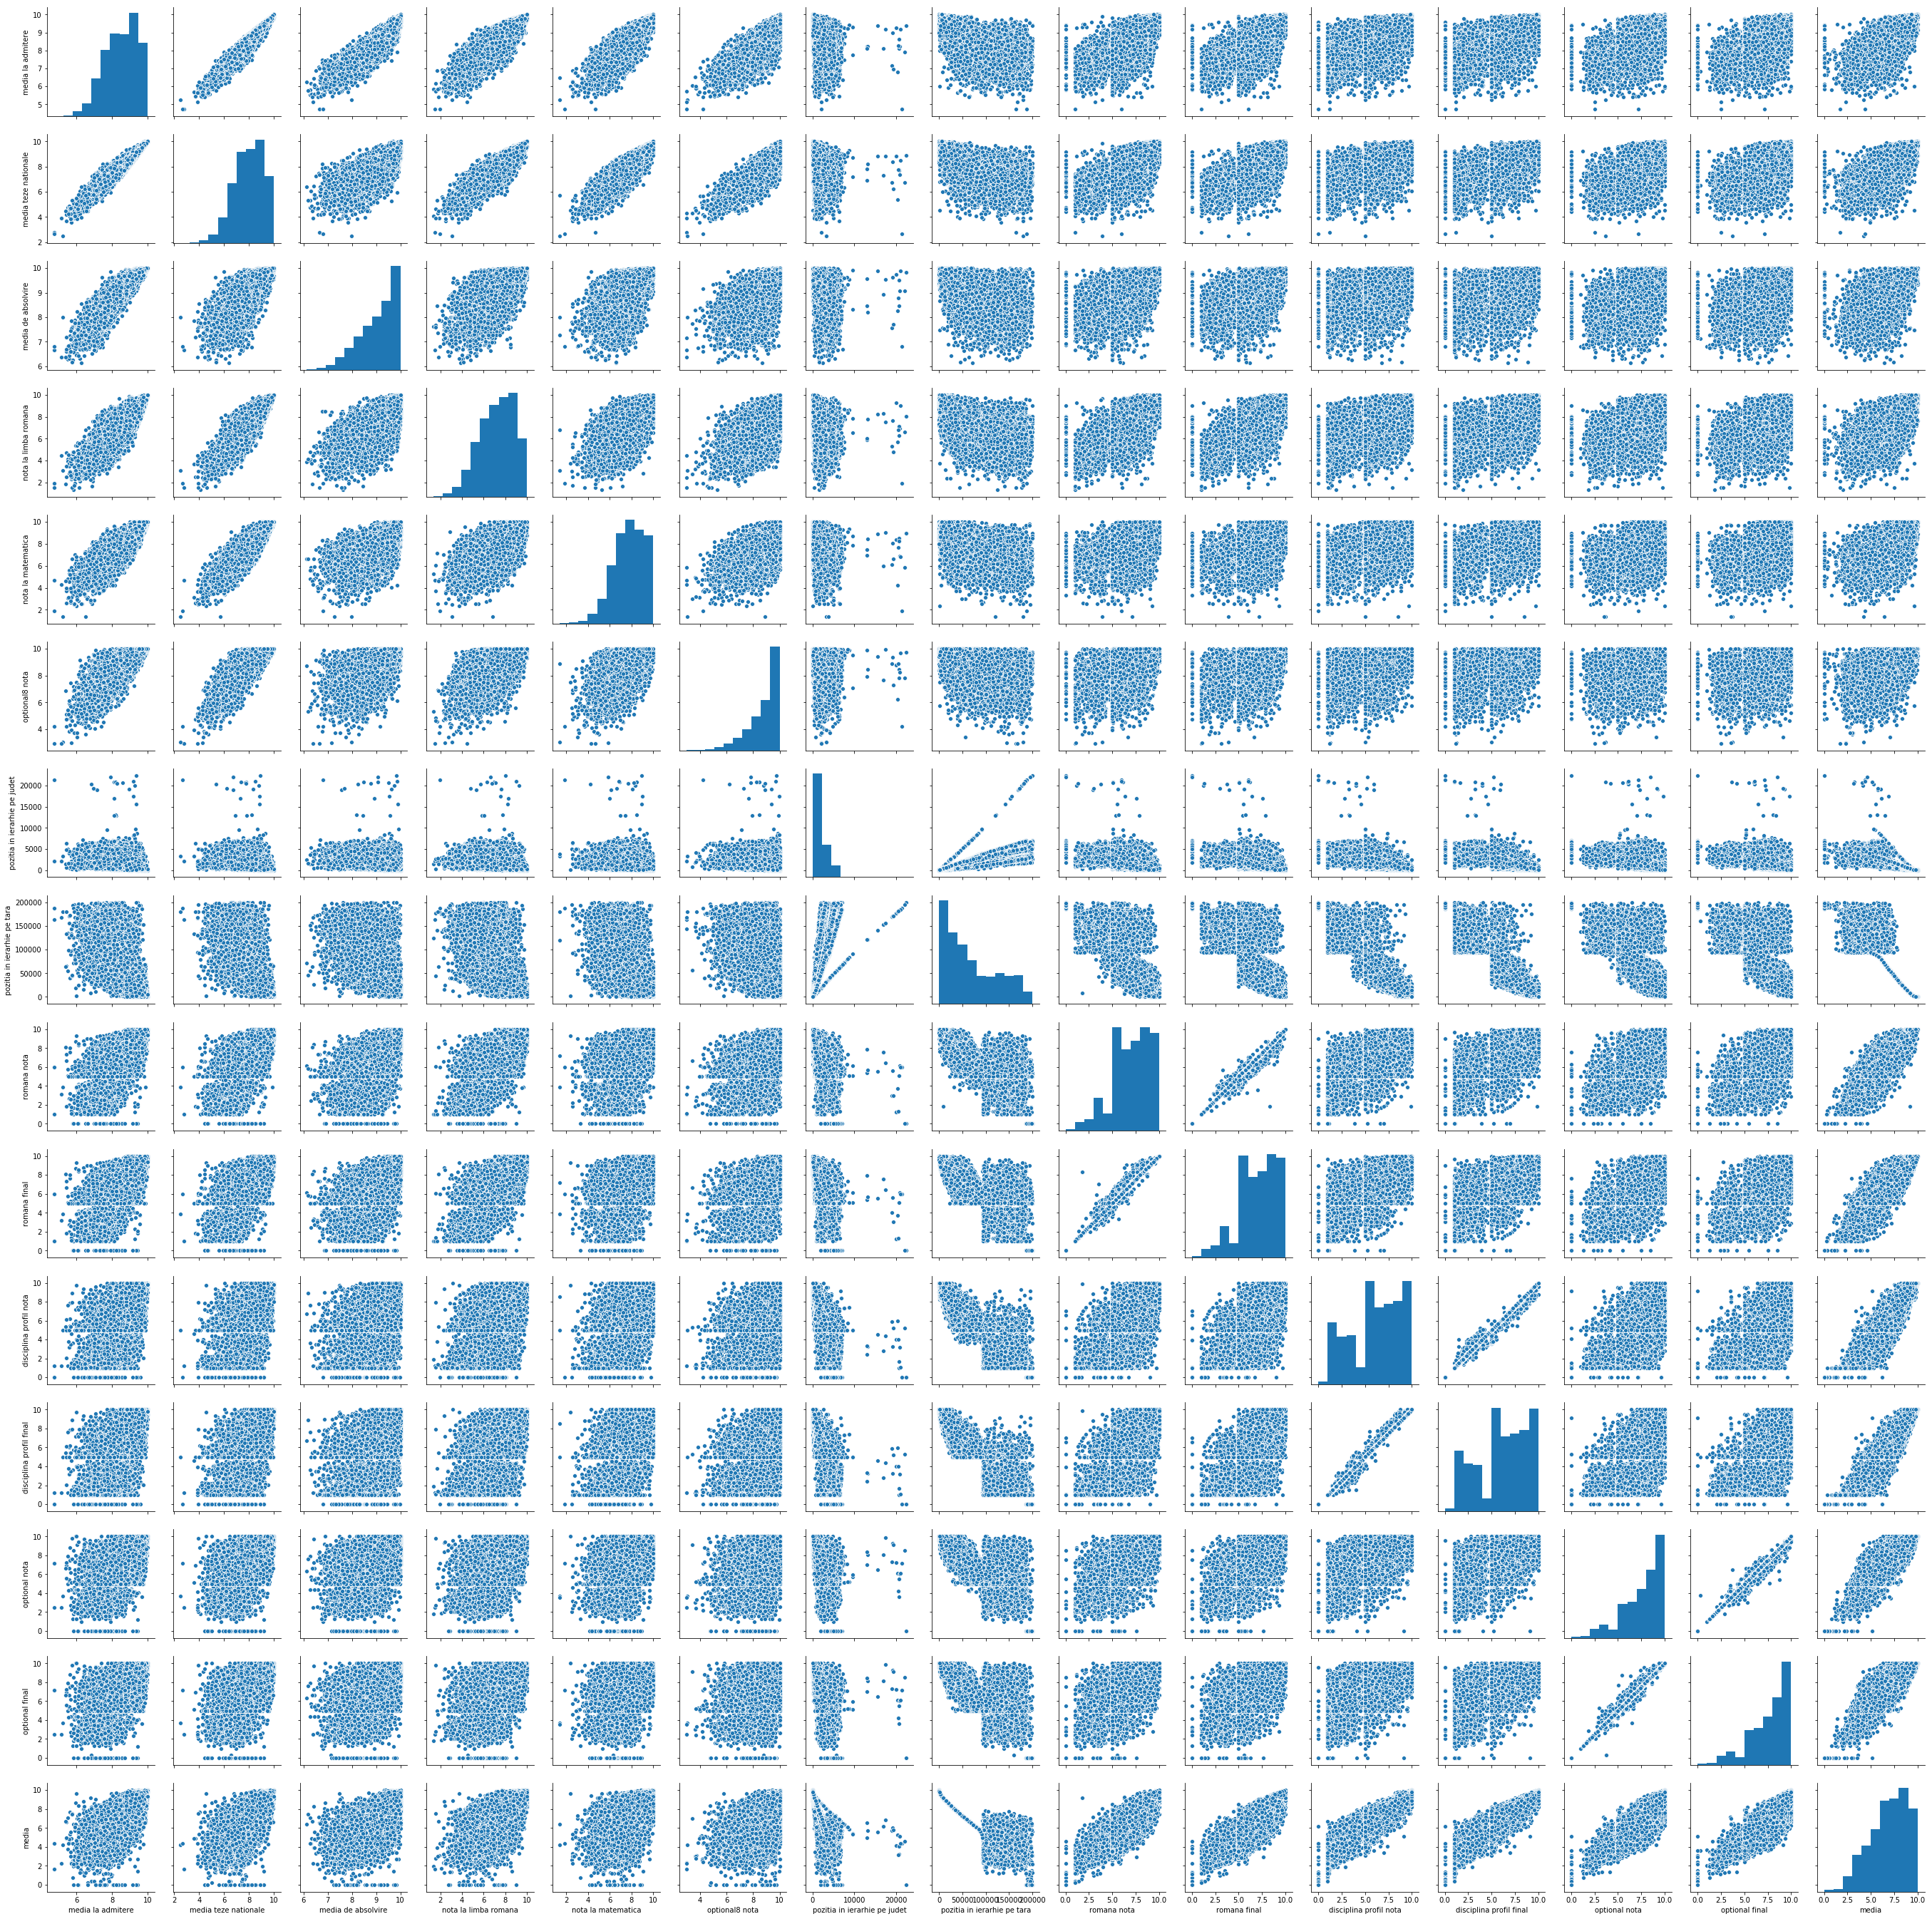

In [27]:
sns.pairplot(df[number_columns])